In [1]:
import LAMINAR
import numpy as np
import torch
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons, make_swiss_roll, make_circles

In [2]:
def moons(n=2500):
    X, y = make_moons(n_samples=n, noise=0.1)
    X = X.astype(np.float32)
    X = (X - X.mean(axis=0))/X.std(axis=0)
    return X

def swiss_roll(n=2500):
    X, y = make_swiss_roll(n_samples=n, noise=0.75)
    X = X.astype(np.float32)[:, [0, 2]]
    X = (X - X.mean(axis=0))/X.std(axis=0)
    return X

def circles(n=2500):
    X, y = make_circles(n_samples=n, noise=0.05, factor=0.5)
    X = X.astype(np.float32)
    X = (X - X.mean(axis=0))/X.std(axis=0)
    return X

def uniform_sphere(n=2500):
    X = np.random.normal(0, 1, (n, 2))
    X = torch.tensor(X, dtype=torch.float32)
    X = LAMINAR.utils.gaussian2uniform.gaussian_to_sphere(X).numpy()
    X = (X - X.mean(axis=0))/X.std(axis=0)
    return X

def gaussians(n=2500):
    m1 = np.array([-1, 0])
    m2 = np.array([1, 1.5])

    c1 = np.array([[1, 0.8], [0.8, 1]])
    c2 = np.array([[1, -0.75], [-0.75, 1]])

    X1 = np.random.multivariate_normal(m1, c1, n//2)
    X2 = np.random.multivariate_normal(m2, c2, n//2)

    X = np.concatenate([X1, X2], axis=0)

    X = (X - X.mean(axis=0))/X.std(axis=0)
    return X

In [3]:
data_1 = moons(500)
data_2 = swiss_roll(500)
data_3 = circles(500)

titles = ['Moons', 'Swiss Roll', 'Circles']

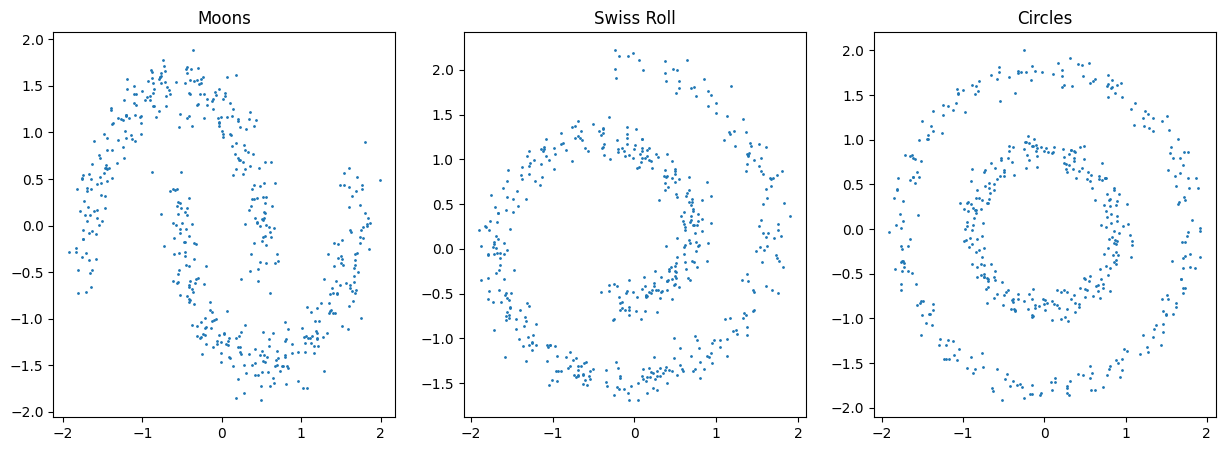

In [4]:
# plot in subplots

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].scatter(data_1[:, 0], data_1[:, 1], s=1)
ax[0].set_title(titles[0])

ax[1].scatter(data_2[:, 0], data_2[:, 1], s=1)
ax[1].set_title(titles[1])

ax[2].scatter(data_3[:, 0], data_3[:, 1], s=1)
ax[2].set_title(titles[2])

plt.show()

In [5]:
hyperparameters = {
    'hidden_dim': 32,
    'width': 64,
    'timesteps': 50,
    'learning_rate': 5e-3,
    'patience': 50,
    'sig': 3,
    'batch_size': 256,
}

e = 100

LAM_moons = LAMINAR.LAMINAR(data_1, epochs=e, grid_resolution=57, hyperparameters=hyperparameters)
LAM_swiss_roll = LAMINAR.LAMINAR(data_2, epochs=e, grid_resolution=57, hyperparameters=hyperparameters)
LAM_circles = LAMINAR.LAMINAR(data_3, epochs=e, grid_resolution=57, hyperparameters=hyperparameters)

KeyboardInterrupt: 

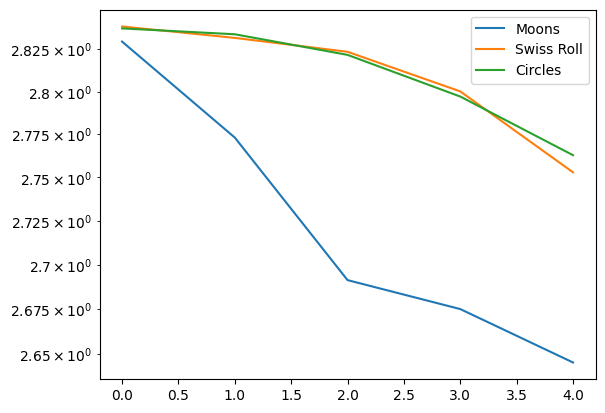

In [ ]:
plt.plot(LAM_moons.loss_history, label=titles[0])
plt.plot(LAM_swiss_roll.loss_history, label=titles[1])
plt.plot(LAM_circles.loss_history, label=titles[2])

plt.yscale('log')
plt.legend()

In [ ]:
print(titles[0])
LAM_moons.p_value()
print('\n')
print(titles[1])
LAM_swiss_roll.p_value()
print('\n')
print(titles[2])
LAM_circles.p_value()
print('\n')

Moons
Henze-Zirkler p-value:	4.570867521021467e-40


Swiss Roll
Henze-Zirkler p-value:	4.043102038369405e-37


Circles
Henze-Zirkler p-value:	1.2768750139991344e-20




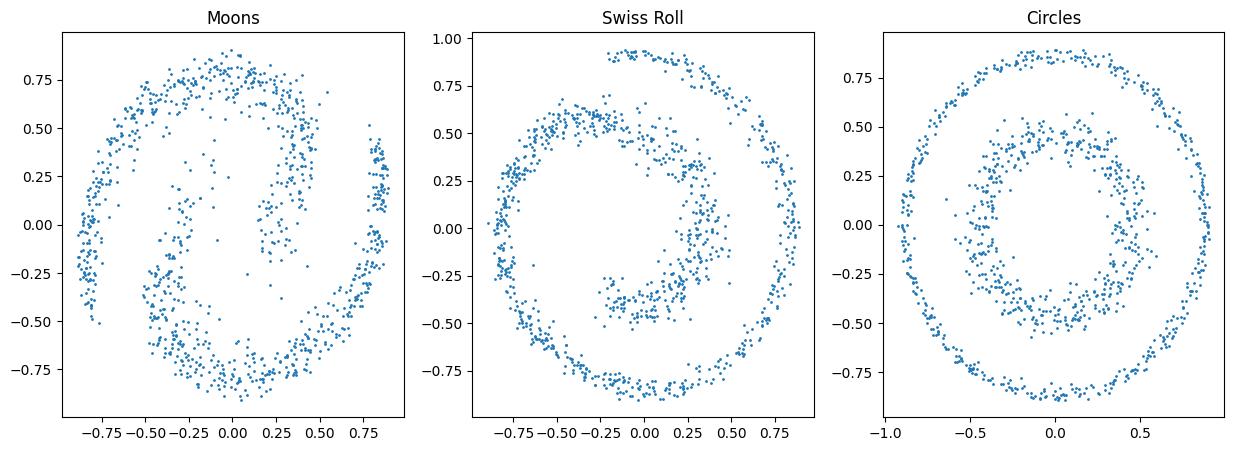

In [ ]:
# plot pushed data

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].scatter(LAM_moons.data_pushed[:, 0], LAM_moons.data_pushed[:, 1], s=1)
ax[0].set_title(titles[0])

ax[1].scatter(LAM_swiss_roll.data_pushed[:, 0], LAM_swiss_roll.data_pushed[:, 1], s=1)
ax[1].set_title(titles[1])

ax[2].scatter(LAM_circles.data_pushed[:, 0], LAM_circles.data_pushed[:, 1], s=1)
ax[2].set_title(titles[2])

plt.show()

In [ ]:
# get point index 
idx_1 = 2
idx_2 = 2
idx_3 = 2 

1000
1000
1000


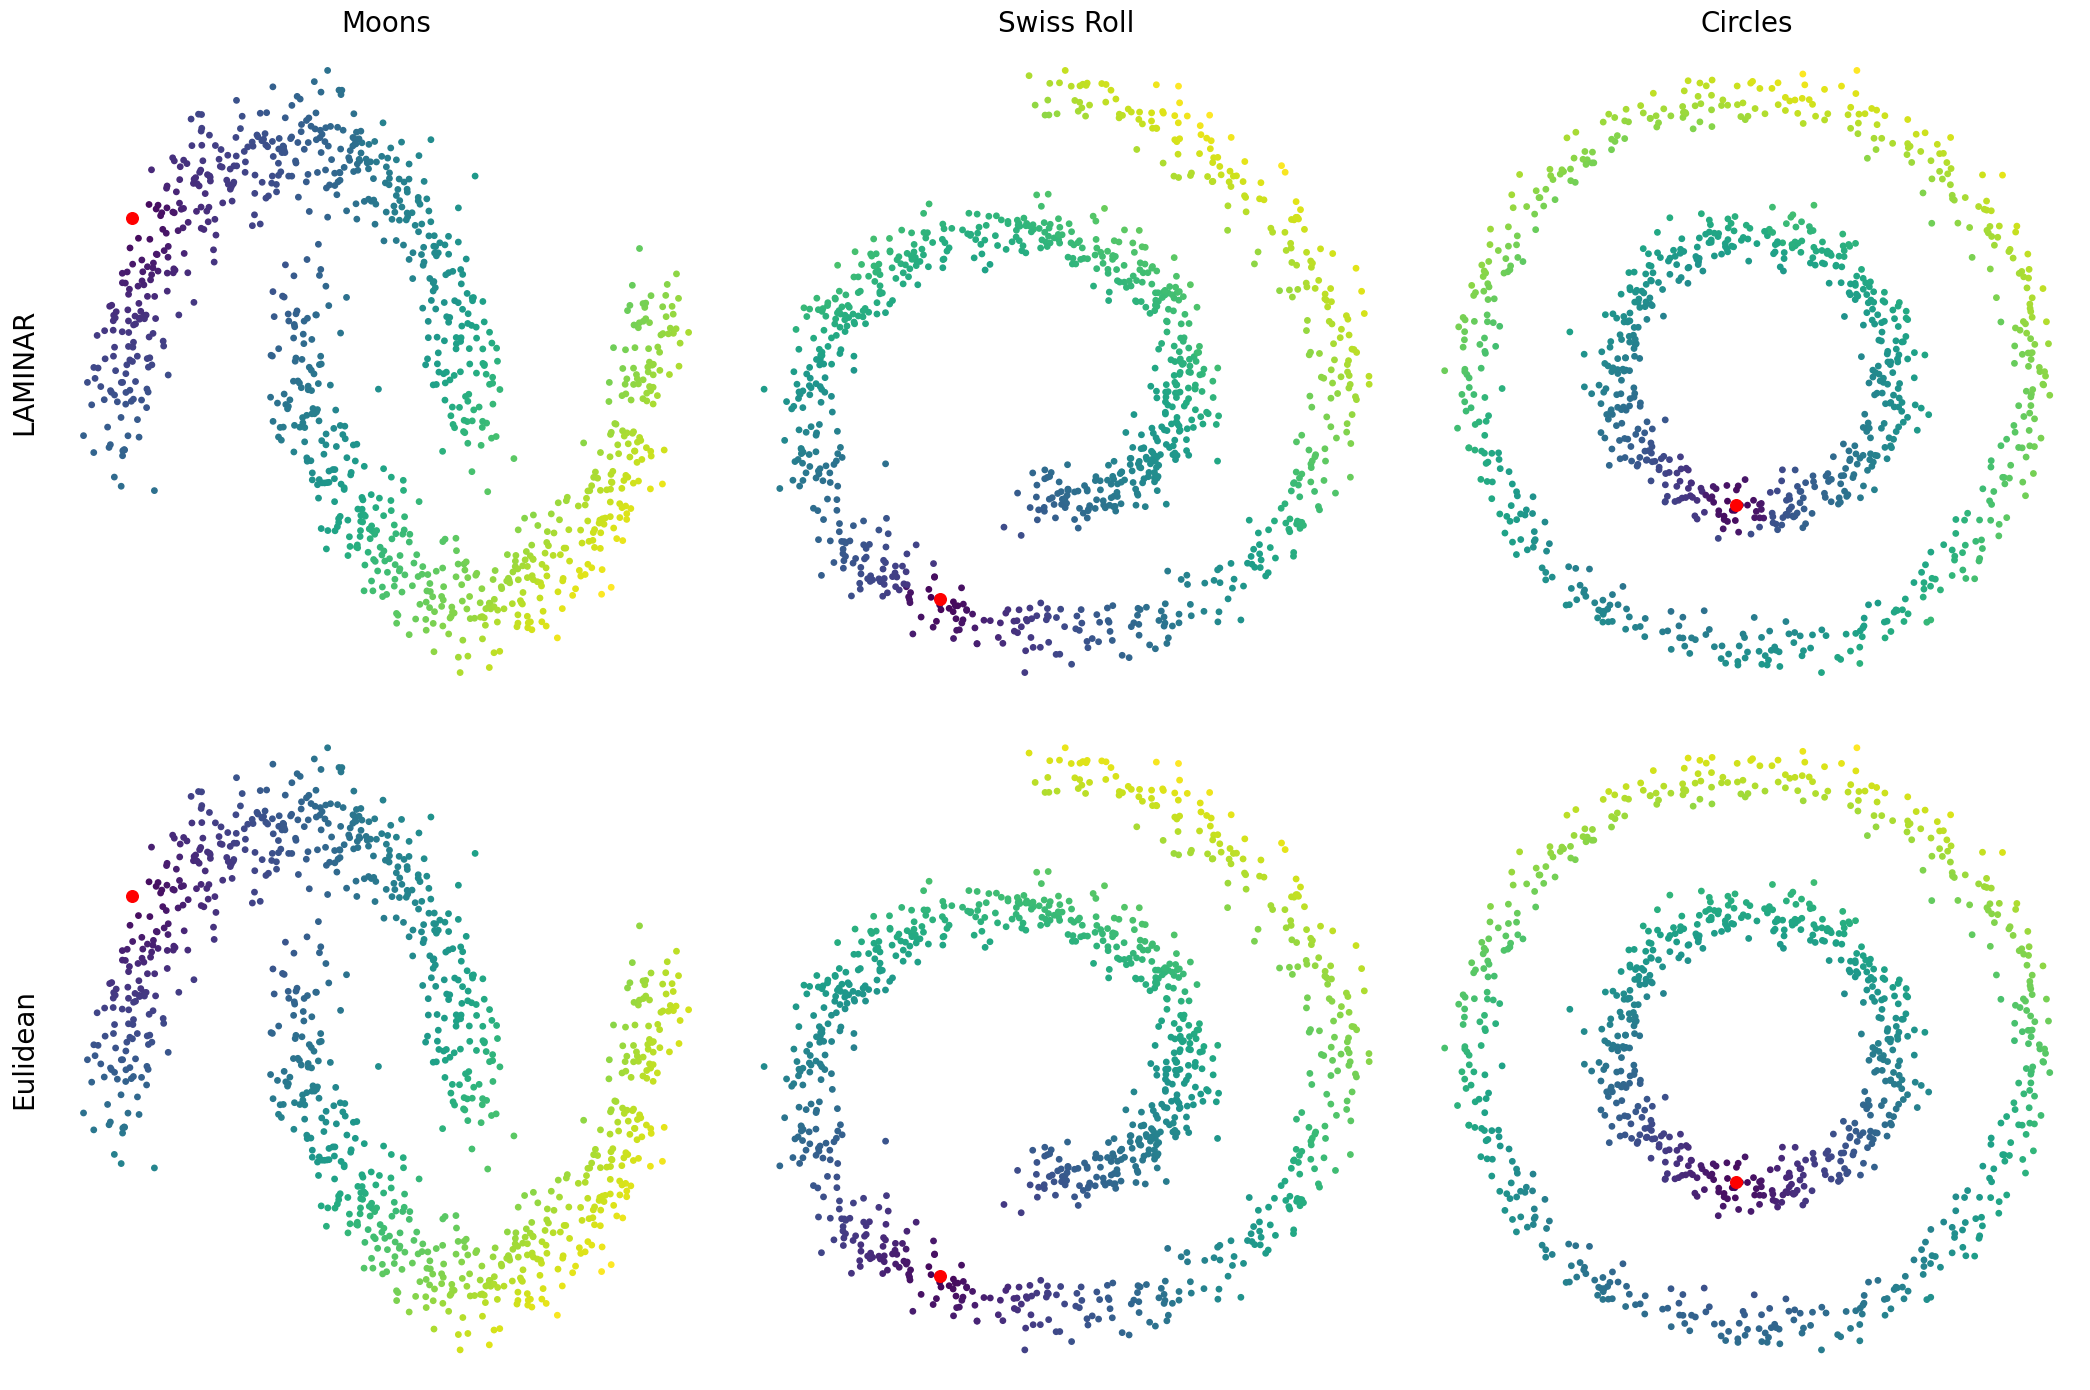

In [ ]:
# point between 0 and 2500
point = [idx_1, idx_2, idx_3]

frame = False

moon_dist = LAM_moons.distance(data_1[point[0]])
swiss_roll_dist = LAM_swiss_roll.distance(data_2[point[1]])
circles_dist = LAM_circles.distance(data_3[point[2]])

moon_eu = np.linalg.norm(data_1 - data_1[point[0]], axis=1)
swiss_roll_eu = np.linalg.norm(data_2 - data_2[point[1]], axis=1)
circles_eu = np.linalg.norm(data_3 - data_3[point[2]], axis=1)

size_regular = 15
size_cross = 70
fig, ax = plt.subplots(2, 3, figsize=(21, 14))

ax[0,0].scatter(data_1[:, 0], data_1[:, 1], c=moon_dist, s=size_regular)
ax[0,0].scatter(data_1[point[0], 0], data_1[point[0], 1], c='r', s=size_cross, marker='o')
ax[0,0].set_title(titles[0], fontsize=20)
if not frame:
    ax[0,0].spines['top'].set_visible(False)
    ax[0,0].spines['right'].set_visible(False)
    ax[0,0].spines['bottom'].set_visible(False)
    ax[0,0].spines['left'].set_visible(False)
    ax[0,0].xaxis.set_ticks_position('none')
    ax[0,0].yaxis.set_ticks_position('none')
    ax[0,0].set_xticklabels([])
    ax[0,0].set_yticklabels([])

ax[0,1].scatter(data_2[:, 0], data_2[:, 1], c=swiss_roll_dist, s=size_regular)
ax[0,1].scatter(data_2[point[1], 0], data_2[point[1], 1], c='r', s=size_cross, marker='o')
ax[0,1].set_title(titles[1], fontsize=20)
if not frame:
    ax[0,1].axis('off')

ax[0,2].scatter(data_3[:, 0], data_3[:, 1], c=circles_dist, s=size_regular)
ax[0,2].scatter(data_3[point[2], 0], data_3[point[2], 1], c='r', s=size_cross, marker='o')
ax[0,2].set_title(titles[2], fontsize=20)
if not frame:
    ax[0,2].axis('off')

ax[1,0].scatter(data_1[:, 0], data_1[:, 1], c=moon_eu, s=size_regular)
ax[1,0].scatter(data_1[point[0], 0], data_1[point[0], 1], c='r', s=size_cross, marker='o')
if not frame:
    ax[1,0].spines['top'].set_visible(False)
    ax[1,0].spines['right'].set_visible(False)
    ax[1,0].spines['bottom'].set_visible(False)
    ax[1,0].spines['left'].set_visible(False)
    ax[1,0].xaxis.set_ticks_position('none')
    ax[1,0].yaxis.set_ticks_position('none')
    ax[1,0].set_xticklabels([])
    ax[1,0].set_yticklabels([])

ax[1,1].scatter(data_2[:, 0], data_2[:, 1], c=swiss_roll_eu, s=size_regular)
ax[1,1].scatter(data_2[point[1], 0], data_2[point[1], 1], c='r', s=size_cross, marker='o')
if not frame:
    ax[1,1].axis('off')

ax[1,2].scatter(data_3[:, 0], data_3[:, 1], c=circles_eu, s=size_regular)
ax[1,2].scatter(data_3[point[2], 0], data_3[point[2], 1], c='r', s=size_cross, marker='o')
if not frame:
    ax[1,2].axis('off')

if frame:
    for i in range(2):
        for j in range(3):
            ax[i,j].set_xticklabels([])
            ax[i,j].set_yticklabels([])
            ax[i,j].yaxis.set_ticks_position('none')
            ax[i,j].xaxis.set_ticks_position('none')       


# give the entire row a label
ax[0,0].set_ylabel('LAMINAR', fontsize=20)
ax[1,0].set_ylabel('Eulidean', fontsize=20)

plt.tight_layout()
plt.show()


1000
1000
1000


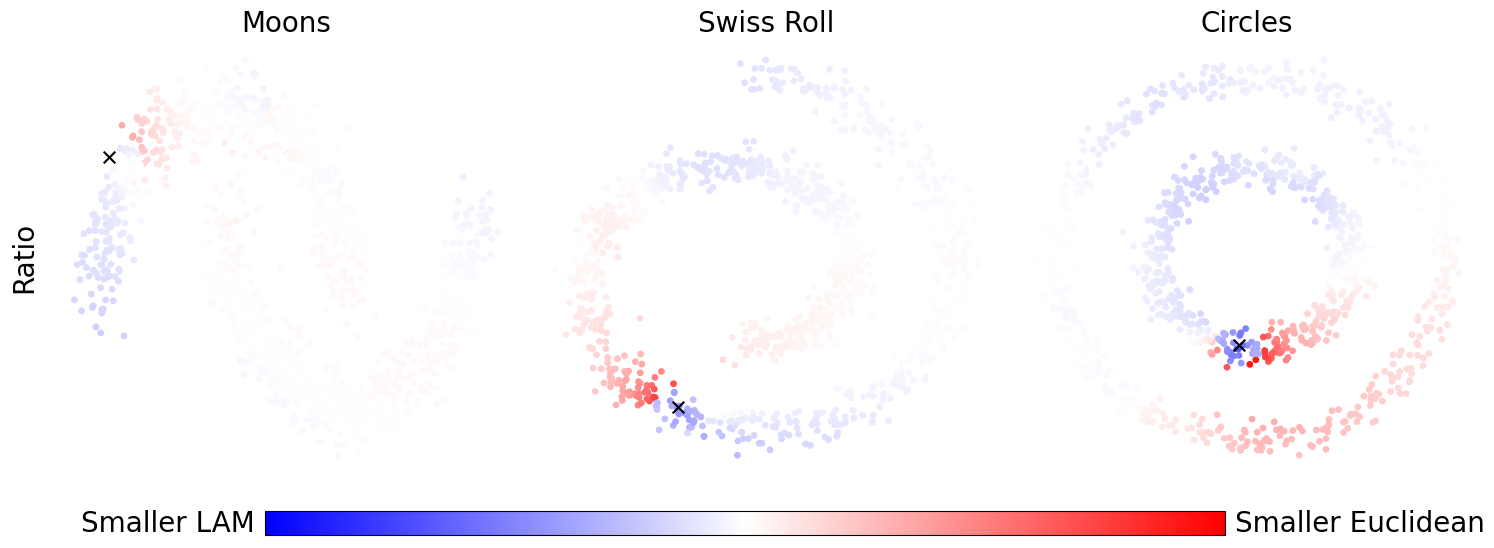

In [ ]:
# point between 0 and 2500
point = [idx_1, idx_2, idx_3]

frame = False

data_1_dist = LAM_moons.distance(data_1[point[0]])
data_2_dist = LAM_swiss_roll.distance(data_2[point[1]])
data_3_dist = LAM_circles.distance(data_3[point[2]])

data_1_eu = np.linalg.norm(data_1 - data_1[point[0]], axis=1)
data_2_eu = np.linalg.norm(data_2 - data_2[point[1]], axis=1)
data_3_eu = np.linalg.norm(data_3 - data_3[point[2]], axis=1)

# note idices where the distance is 0
data_1_zero = np.where(data_1_dist == 0)[0].reshape(-1)
data_2_zero = np.where(data_2_dist == 0)[0].reshape(-1)
data_3_zero = np.where(data_3_dist == 0)[0].reshape(-1)


# Filter out values of 0 and log
data_1_dist = np.log(data_1_dist[data_1_dist != 0])
data_2_dist = np.log(data_2_dist[data_2_dist != 0])
data_3_dist = np.log(data_3_dist[data_3_dist != 0])

data_1_eu = np.log(data_1_eu[data_1_eu != 0])
data_2_eu = np.log(data_2_eu[data_2_eu != 0])
data_3_eu = np.log(data_3_eu[data_3_eu != 0])

# standardise
data_1_dist = (data_1_dist - np.mean(data_1_dist)) / np.std(data_1_dist)
data_2_dist = (data_2_dist - np.mean(data_2_dist)) / np.std(data_2_dist)
data_3_dist = (data_3_dist - np.mean(data_3_dist)) / np.std(data_3_dist)

data_1_eu = (data_1_eu - np.mean(data_1_eu)) / np.std(data_1_eu)
data_2_eu = (data_2_eu - np.mean(data_2_eu)) / np.std(data_2_eu)
data_3_eu = (data_3_eu - np.mean(data_3_eu)) / np.std(data_3_eu)

# ratio is difference
data_1_ratio = data_1_dist - data_1_eu
data_2_ratio = data_2_dist - data_2_eu
data_3_ratio = data_3_dist - data_3_eu

# insert the value 0 again for the removed 0 values
data_1_ratio = np.insert(data_1_ratio, data_1_zero, 0)
data_2_ratio = np.insert(data_2_ratio, data_2_zero, 0)
data_3_ratio = np.insert(data_3_ratio, data_3_zero, 0)

size_regular = 15
size_cross = 70

# most extreme values
extreme = 1.5

fig, ax = plt.subplots(1, 3, figsize=(15, 6))

scatter1 = ax[0].scatter(data_1[:, 0], data_1[:, 1], c=data_1_ratio, cmap='bwr', s=size_regular, vmin=-extreme, vmax=extreme)
ax[0].scatter(data_1[point[0], 0], data_1[point[0], 1], c='black', s=size_cross, marker='x')
ax[0].set_title(titles[0], fontsize=20)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].xaxis.set_ticks_position('none')
ax[0].yaxis.set_ticks_position('none')
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])

scatter2 = ax[1].scatter(data_2[:, 0], data_2[:, 1], c=data_2_ratio, cmap='bwr', s=size_regular, vmin=-extreme, vmax=extreme)
ax[1].scatter(data_2[point[1], 0], data_2[point[1], 1], c='black', s=size_cross, marker='x')
ax[1].set_title(titles[1], fontsize=20)
ax[1].axis('off')

scatter3 = ax[2].scatter(data_3[:, 0], data_3[:, 1], c=data_3_ratio, cmap='bwr', s=size_regular, vmin=-extreme, vmax=extreme)
ax[2].scatter(data_3[point[2], 0], data_3[point[2], 1], c='black', s=size_cross, marker='x')
ax[2].set_title(titles[2], fontsize=20)
ax[2].axis('off')

# give the entire row a label
ax[0].set_ylabel('Ratio', fontsize=20)

# Add colorbar
fig.tight_layout()
fig.subplots_adjust(bottom=0.2)
cbar_ax = fig.add_axes([0.18, 0.1, 0.64, 0.04])
cbar = fig.colorbar(scatter1, cax=cbar_ax, orientation='horizontal')
cbar.set_ticks([])
#cbar.set_ticklabels(['Smaller LAM', 'Indifferent', 'Smaller Euclidean'])

# add a text
fig.text(0.115, 0.105, 'Smaller LAM', ha='center', fontsize=20)
fig.text(0.91, 0.105, 'Smaller Euclidean', ha='center', fontsize=20)

#plt.tight_layout()
plt.show()
